## Calculating an Average and Standard Deviation

This notebook allows you to calculate the average of a set of numbers and the standard deviation of that average.

### NOTES on how to use this script

- This script includes **editable** cells (where you will enter your own data) and **non-editable** cells (where there is analysis code). If you are unable to make changes to a cell, it is because we want you to run the code *exactly* as it is written.

- Cells are heaviliy commented. Lines in code cells which begin with the pound sign (\#) are comments. Comments are not executable code. They typically describe what the code in the cell is doing.

- To execute a cell, click on a cell and press `shift` + `return` at the same time. Once a cell has been run, the results are stored in memory. Cells can be executed in any order, but most scripts (including this one) are meant to be run from top to bottom because cells lower down may use output or results from cells higher up.

In [8]:
# This cell must be run first because it imports the 'numpy' library (which helps us do math things easier)
# and re-names it 'np' for short.
import numpy as np

# This command allows us to create interactive plots
%matplotlib notebook

# The 'print' command will make text appear below the cell when it runs.
print("It worked!")

# Test this cell out by pressing 'shift' + 'return'!

It worked!


In the next cell we create an array which will hold a series of numbers which will then be averaged together.  You will edit the cell to enter data which for which you wish to calculate the average value.  Comments in the code cell explain what each line of code is doing.

In [9]:
# Here we create an array of numbers. We give the array the name 'times' to indicate what it contains. 
# Enter your data, separated by commas, in between the brackets. Remember to delete any existing data first.
times = np.array([11.59, 11.53, 11.50, 11.50, 11.63])

# Here we create a constant containing a single number. We name the constant 'N_times' because it represents
# the number of period values which we entered into the array named times. The function 'len' measures the length of
# array of numbers.
N_times = len(times)

#After you change the data here, run the cell by pressihg shift+return.
#If it works, your list of numbers and its length will be displayed below.
print(times)
print(N_times)

[11.59 11.53 11.5  11.5  11.63]
5


#### <div style = "background-color: orange"> If something goes wrong, copy the following backup text and paste it in the cell above to start over </div>
<br>

<div class = "code" style = "background-color: silver" >
#Here we create an array of numbers. We give the array the name 'times' to indicate what it contains. 

#Enter your data, separated by commas, in between the brackets. Remember to delete any existing data first.

times = np.array([11.59, 11.53, 11.50, 11.50, 11.63])

#Here we create a constant containing a single number. We name the constant 'N_times' because it represents

#the number of period values which we entered into the array named times. The function 'len' measures the length of

#array of numbers.

N_times = len(times)

#After you change the data here, run the cell by pressihg shift+return.

#If it works, your list of numbers and its length will be displayed below.

print(times)

print(N_times)
</div>

The next few lines of code will compute the average of the values contained in the array `times`. Recall that an average over a list of $N$ values of some variable $x_i$ is defined as $\bar{x} = \frac{1}{N} \sum_i x_i$.

- First, create a variable named `t_sum` which will contain the sum of all the time values. (Do you see how we take care to give our variables and arrays names which are descriptive of the data they contain?) We give it an initial value of 0.

- Next, use a "loop" to add each element of the `times` array to our running total, `t_sum`. This loop will run `N_times`, the length of the `times` array.

- Finally, divide this sum by the total number of elements in the array.

In [10]:
#t_sum will be our running total
t_sum = 0

#loop over all values in the array 'times'
for i in range(0, N_times):
    t_sum = t_sum + times[i] #This indented line of code is gets executed 'N_times' times.

#The variable 't_sum' now contains the sum of all of the values from the array 'times'.
#Now we compute the average of the time values by dividing 't_sum' by the value stored in 'N_times'.
t_avg = t_sum / N_times

The next code cell calculates the standard deviation of the average according to the formula $\sigma = \sqrt{\frac{\sum_i{(x_i - \bar{x})^2}}{N-1}}$ where $x_i$ are the time values, $\bar{x}$ is the average time, and $N$ is the number of times values which were averaged.

In [11]:
#You should recognize the pattern of how we are structuring our code cells now.
#We begin by definine two variables which will be needed for the calculation and initializing them to the value zero.
#"t_std" will hold the computed standard deviation.
#"t2" will contain the sum of the squared differences.
t_std = 0
t2 = 0

#Similar to the previous code cell, loop over all of the values in the 'times' array,
#Compute the difference from the average time, square the result and add it to the sum.
for i in range(0, N_times):
    t2 = t2 + (times[i] - t_avg)**2

#Now take the square root of the t2 divided by the number of values in the sum.
#Note that the "sqrt" function which performs the square root is contained in the numpy library
#which was imported and named np back in the first code cell of this notebook.  
#The way that a library function is used is to call it using the syntax "Library Name"."Function Name".
t_std = np.sqrt(t2/(N_times-1))

#Print the computed average and standard deviation.

print(" Average = %.3f" % (t_avg))
print(" Standard Deviation = %.3f" % (t_std))

 Average = 11.550
 Standard Deviation = 0.058


## Optional visualizations
In addition to calculating the numerical values of the average and standard deviation, we can use them as part of our data visualization. For example, we can create a histogram of our data annotated with our calculated values.

<IPython.core.display.Javascript object>


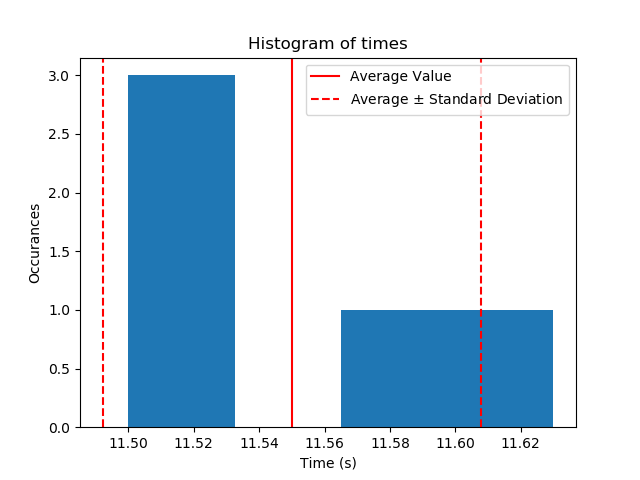

In [12]:
# The following code uses the matplotlib library to create a histogram of our data,
# and to overlay values for the average and one standarde deviation from the average on top of our plot

import matplotlib.pyplot as plt
plt.figure(1)
plt.hist(times, bins='auto')
# This and the plt.show() command are all we need to create the histogram, the rest here is for the lines and labeling
plt.axvline(t_avg, label='Average Value', color = 'r')
plt.axvline(t_avg + t_std ,label = 'Average $\pm$ Standard Deviation',ls='--', color = 'r')
plt.axvline(t_avg - t_std ,ls='--', color = 'r')

plt.xlabel('Time (s)')
plt.ylabel('Occurances')
plt.title('Histogram of times')
plt.legend()

plt.show()

Alternatively, we can make a scatter plot of our data with error bars on each individual point

<IPython.core.display.Javascript object>


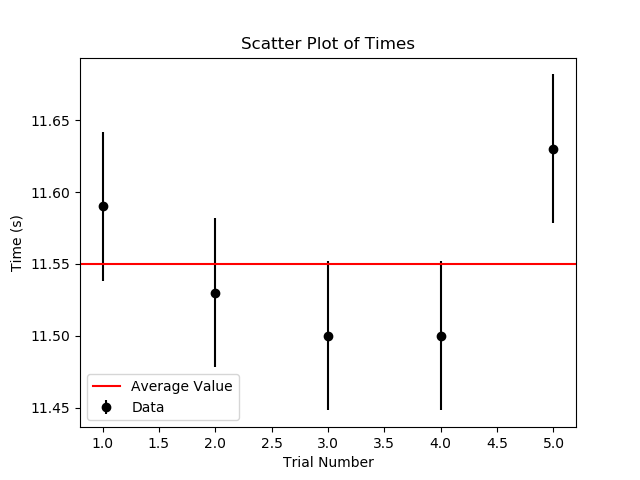

In [13]:
plt.figure(2)
plt.errorbar(np.linspace(1,len(times),len(times)),times,np.std(times),fmt='ko', label = 'Data')
plt.axhline(t_avg, label='Average Value', color = 'r')

plt.xlabel('Trial Number')
plt.ylabel('Time (s)')
plt.title('Scatter Plot of Times')
plt.legend(loc='lower left')
plt.show()